## Model Development

#### importing labraries

In [9]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import joblib
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,mean_squared_log_error,r2_score

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor


import tensorflow

from tensorflow import keras
from keras import layers
from keras.layers import LSTM,Dense
from keras.models import Sequential



2024-08-23 11:48:13.426425: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-23 11:48:13.429410: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-23 11:48:13.533157: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-23 11:48:13.955142: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-23 11:48:16.947682: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [6]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [7]:
df=pd.read_csv("DATA/df3.csv")

In [2]:
df=pd.read_csv("DATA/df7.csv")

In [3]:
df.head()

,Unnamed: 0,week,center_id,meal_id,checkout_price,num_orders,region_code,op_area,discount_perc,discount y/n,featured_promotion,new_category_cuisine,new_center_type_city_code
0,0,1,55,1885,136.83,177,56,2.0,0.10,1,0,3,57
1,1,2,55,1885,135.83,323,56,2.0,0.11,1,0,3,57
2,2,3,55,1885,132.92,96,56,2.0,0.01,1,0,3,57
3,3,4,55,1885,135.86,163,56,2.0,-0.01,0,0,3,57
4,4,5,55,1885,146.50,215,56,2.0,0.01,1,0,3,57


In [4]:
X=df.drop(['num_orders'],axis=1)
y=df['num_orders']

### Scaling Data

In [5]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(X)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=False)

In [7]:
  # SVR
  svr = SVR()
  svr_params = {
      'kernel': ['linear', 'poly', 'rbf'],
      'C': [0.1, 1, 10],
      'epsilon': [0.1, 0.2, 0.5]
  }

  # Linear Regression
  lr = LinearRegression()
  lr_params = {
      'fit_intercept': [True, False],
      'normalize': [True, False]
  }

  # Decision Tree Regressor
  dt = DecisionTreeRegressor()
  dt_params = {
      'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
      'max_depth': [None, 10, 20, 30],
      'min_samples_split': [2, 5, 10],
      'min_samples_leaf': [1, 2, 4]
  }

  # Lasso
  lasso = Lasso()
  lasso_params = {
      'alpha': [0.1, 1, 10],
      'fit_intercept': [True, False],
      'normalize': [True, False],
      'max_iter': [1000, 2000, 3000]
  }

  # Random Forest Regressor
  rf = RandomForestRegressor()
  rf_params = {
      'n_estimators': [100, 200, 500],
      'max_depth': [None, 10, 20],
      'min_samples_split': [2, 5, 10],
      'min_samples_leaf': [1, 2, 4]
  }


In [8]:
# for storing ml mdoel details like model name, MSE, MAE, r2_score, parameters
best_estimators={}

## Hyperparameter Tuning

## SVR

In [ ]:

grid_search = GridSearchCV(svr, svr_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)
best_estimators['svr'] = grid_search.best_estimator_
print(f'SVR Best Params: {grid_search.best_params_}')
print(f'SVR Best MSE: {-grid_search.best_score_}')

In [ ]:
y_pred = best_estimators['svr'].predict(x_test)
print('mean_absolute_error:',mean_absolute_error(y_pred,y_test))
print('mean_squared_error:',mean_squared_error(y_pred,y_test))
print('r2_score:',r2_score(y_test,y_pred))

In [ ]:
joblib.dump(best_estimators['svr'], 'Model/svr.pkl')

In [ ]:
data['Model'].append('SVR')
data['MAE'].append(mean_absolute_error(y_pred,y_test))
data['MSE'].append(mean_squared_error(y_pred,y_test))
data['R2_score'].append(r2_score(y_test,y_pred))
data['parameters'].append(best_estimators['svr'].get_params())
print(data)

In [ ]:
pd.DataFrame(data).to_csv('modelinfo1.csv', index=False)

### Decision Tree

start=time.time()
grid_search = GridSearchCV(dt, dt_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)
end=time.time()
print(f'Time taken: {end-start}')
best_estimators['decision_tree'] = grid_search.best_estimator_
print(f'decision tree Best Params: {grid_search.best_params_}')
print(f'decision tree Best MSE: {-grid_search.best_score_}')

In [1]:

grid_search = GridSearchCV(dt, dt_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)
best_estimators['decision_tree'] = grid_search.best_estimator_
print(f'decision_tree Best Params: {grid_search.best_params_}')
print(f'decision_tree Best MSE: {-grid_search.best_score_}')

NameError: name 'GridSearchCV' is not defined

In [ ]:
y_pred = best_estimators['decision_tree'].predict(x_test)
print('mean_absolute_error:',mean_absolute_error(y_pred,y_test))
print('mean_squared_error:',mean_squared_error(y_pred,y_test))
print('r2_score:',r2_score(y_test,y_pred))

In [ ]:
joblib.dump(best_estimators['decision_tree'], 'decision_tree.pkl')

In [ ]:
data['Model'].append('decision_tree')
data['MAE'].append(mean_absolute_error(y_pred,y_test))
data['MSE'].append(mean_squared_error(y_pred,y_test))
data['R2_score'].append(r2_score(y_test,y_pred))
data['parameter'].append(best_estimators['decision_tree'].get_params())
print(data)

### Random Forest

In [ ]:
start=time.time()
grid_search = GridSearchCV(rf, rf_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)
end=time.time()
print(f'Time taken: {end-start}')
best_estimators['random_forest'] = grid_search.best_estimator_
print(f'random forest Best Params: {grid_search.best_params_}')
print(f'random forest Best MSE: {-grid_search.best_score_}')

In [ ]:
y_pred = best_estimators['random_forest'].predict(x_test)
print('mean_absolute_error:',mean_absolute_error(y_pred,y_test))
print('mean_squared_error:',mean_squared_error(y_pred,y_test))
print('r2_score:',r2_score(y_test,y_pred))

In [ ]:
data['Model'].append('random_forest')
data['MAE'].append(mean_absolute_error(y_pred,y_test))
data['MSE'].append(mean_squared_error(y_pred,y_test))
data['R2_score'].append(r2_score(y_test,y_pred))
data['parameter'].append([best_estimators['random_forest'].get_params()])
print(data)

In [ ]:
pd.DataFrame(data).to_csv('ModelInfo.csv', index=False)

## Model Info

In [9]:
modelinfo=pd.read_csv('Model/ModelInfo.csv')

In [10]:
modelinfo

,Unnamed: 0,Model,MAE,MSE,R2_score,parameters
0,0,random_forest,100.858620,15879.151709,0.680241,"[{'bootstrap': True, 'ccp_alpha': 0.0, 'criter..."
1,0,SVR,125.044373,24346.502352,0.509734,"{'C': 10, 'cache_size': 200, 'coef0': 0.0, 'de..."
2,1,decision_tree,148.399181,32184.113467,0.351908,"[{'ccp_alpha': 0.0, 'criterion': 'absolute_err..."
3,0,linear Regression,183.947157,49565.823984,-0.582316,"[{'cv': 5, 'error_score': nan, 'estimator__cop..."


In [14]:
ln_model=joblib.load('Model/linear_regression.pkl')

In [39]:
last_row_df = df.iloc[[-1]].drop(['num_orders','Unnamed: 0'], axis=1)
last_row_df
# Predict using the model
prediction = ln_model.predict(last_row_df)
print(prediction)

[73.9959108]


In [17]:
df.iloc[-1]

Unnamed: 0                   456547.00
week                            145.00
center_id                        61.00
meal_id                        2104.00
checkout_price                  581.03
num_orders                       27.00
region_code                      77.00
op_area                           4.50
discount_perc                   581.03
discount y/n                      1.00
featured_promotion                0.00
new_category_cuisine              7.00
new_center_type_city_code         2.00
Name: 456547, dtype: float64

# Time Seires Analysis and modeling 

### LSTM

In [16]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/home/muhammed/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 12, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
classical series , rnn , 

/home/muhammed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/muhammed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


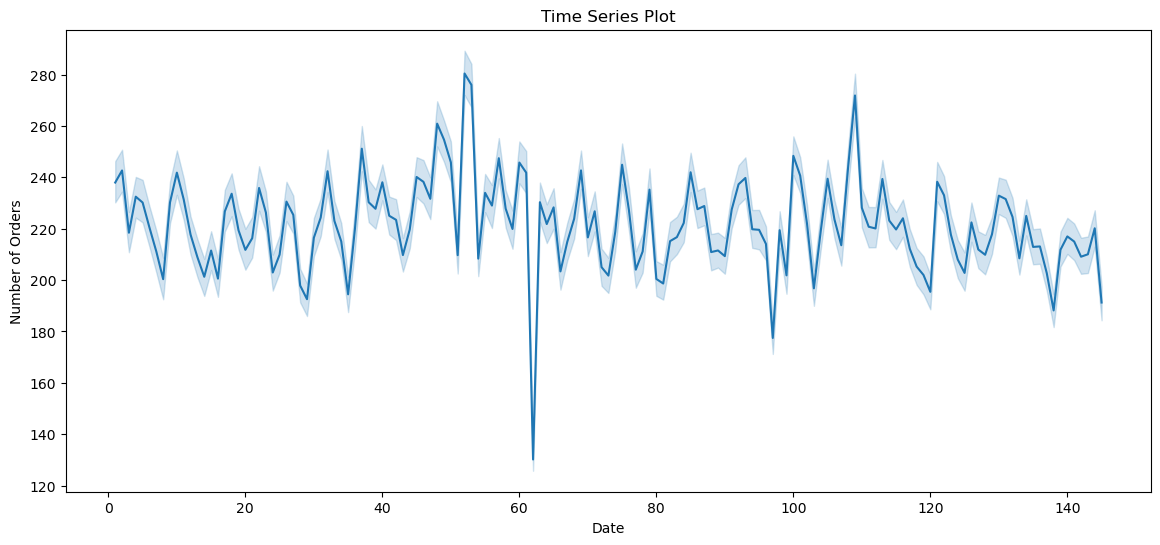

In [7]:
plt.figure(figsize=(14,6))

sns.lineplot(x=df['week'],y=df['num_orders'])
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.show()

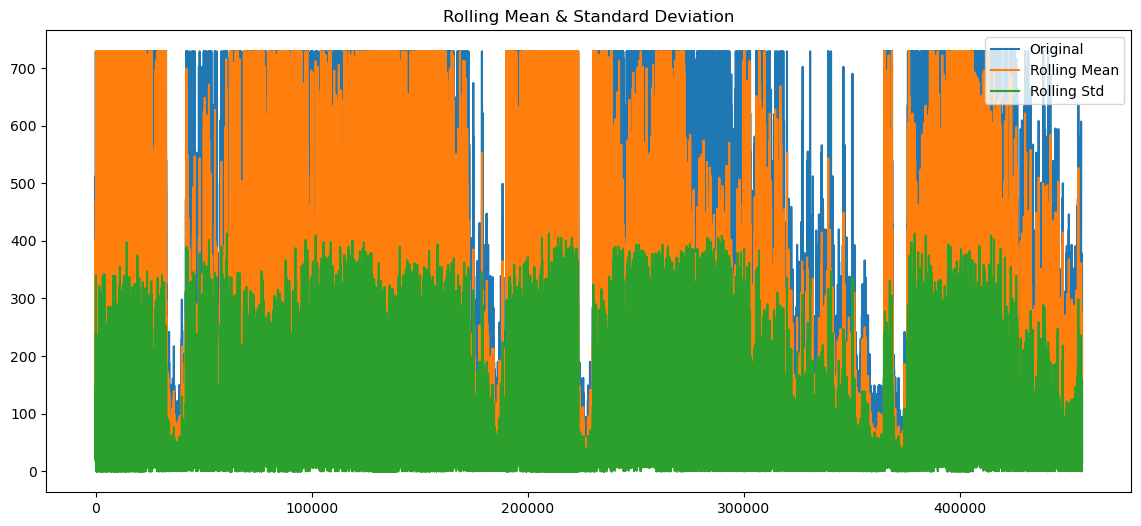

In [16]:
plt.figure(figsize=(14,6))

rolmean = df['num_orders'].rolling(window=4).mean()
rolstd = df['num_orders'].rolling(window=4).std()

plt.plot(df['num_orders'], label='Original')
plt.plot(rolmean, label='Rolling Mean')
plt.plot(rolstd, label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()


In [17]:
rolmean

0            NaN
1            NaN
2            NaN
3         189.75
4         199.25
           ...  
456543    156.00
456544    129.00
456545     61.00
456546     37.00
456547     40.50
Name: num_orders, Length: 456548, dtype: float64

In [18]:
rolstd

0                NaN
1                NaN
2                NaN
3          95.608141
4          95.806663
             ...    
456543    122.297452
456544    135.294740
456545     60.138729
456546     16.990193
456547     10.661457
Name: num_orders, Length: 456548, dtype: float64

In [15]:
df.tail()

,Unnamed: 0,week,center_id,meal_id,checkout_price,num_orders,region_code,op_area,discount_perc,discount y/n,featured_promotion,new_category_cuisine,new_center_type_city_code
456543,456543,141,61,2104,583.03,13,77,4.5,629.61,1,2,7,2
456544,456544,142,61,2104,581.03,42,77,4.5,581.03,1,0,7,2
456545,456545,143,61,2104,583.03,40,77,4.5,580.03,1,0,7,2
456546,456546,144,61,2104,582.03,53,77,4.5,580.03,1,0,7,2
456547,456547,145,61,2104,581.03,27,77,4.5,581.03,1,0,7,2


In [ ]:
result=adfuller(df['num_orders'])

In [ ]:
print(f'ADF statitics: {result[0]}')
print(f'P-value : {resu

In [ ]:
print(2)